In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('AirPassengers.csv')

In [2]:
data

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
data['date'][0] #its present as a string, we need to convert to date-time

'1949-01-01'

In [4]:
data['date']=pd.to_datetime(data['date'])

In [5]:
data['date'][0] #hence we converted to date-time format from string

Timestamp('1949-01-01 00:00:00')

In [6]:
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
ts_data=data.set_index(['date']) #converts date column into indexes

In [8]:
ts_data.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


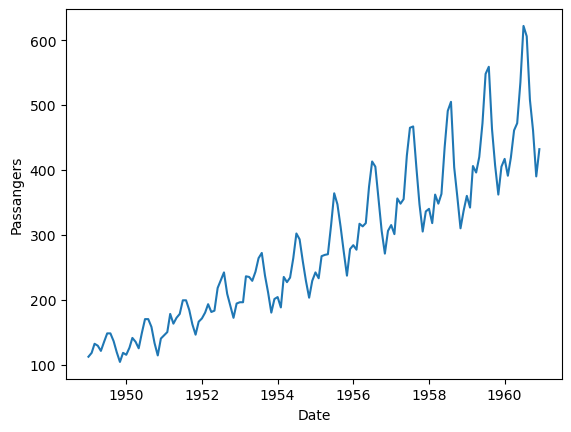

In [9]:
plt.xlabel("Date")
plt.ylabel("Passangers")
plt.plot(ts_data)

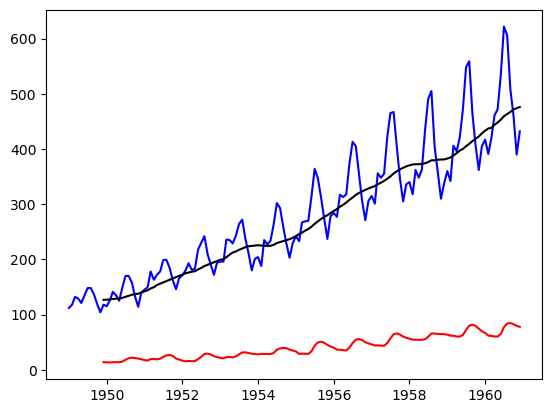

In [10]:
rol_mean=ts_data.rolling(window=12).mean() #rolling mean and std, mean for every 12 values are computed
rol_std=ts_data.rolling(window=12).std()

plt.plot(ts_data,c='blue')
plt.plot(rol_mean,c='black')
plt.plot(rol_std,c='red')

Hence this is a non stationary data verified by rolling statistics

In [11]:
from statsmodels.tsa.stattools import adfuller #adf test
dftest=adfuller(ts_data['value'])
print(dftest)

(0.8153688792060371, 0.9918802434376408, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(ts_data)
trend=decompose.trend
season=decompose.seasonal

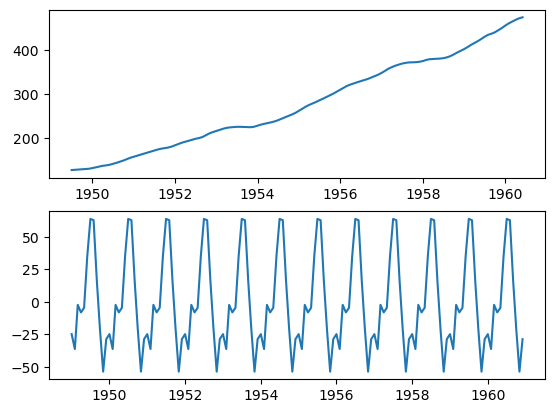

In [14]:
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

# Differencing

In [18]:
ts_data_new=ts_data['value']-ts_data['value'].shift(2)

In [19]:
ts_data_new

date
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: value, Length: 144, dtype: float64

In [20]:
adfuller(ts_data_new.dropna()) #shift according to alpha value such that p value is less than alpha

(-2.9616951355554217,
 0.03862975767698862,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

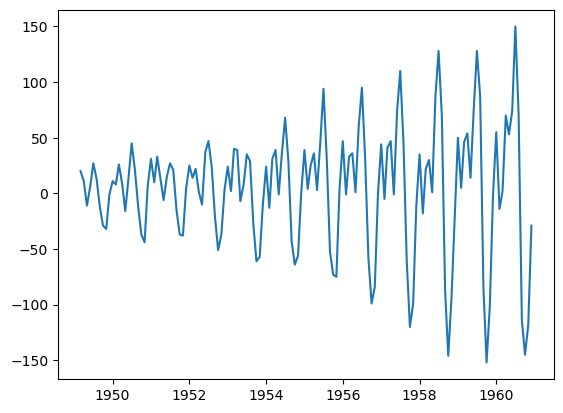

In [22]:
plt.plot(ts_data_new.dropna())

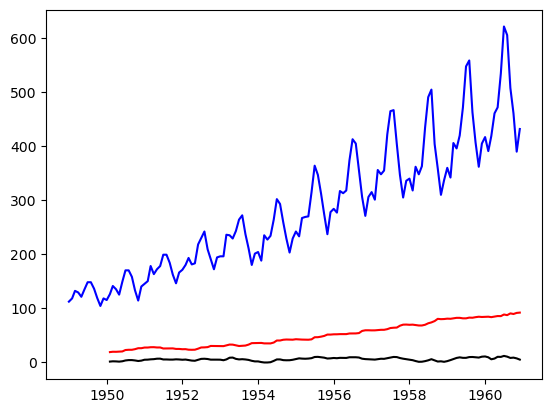

In [23]:
rol_mean=ts_data_new.rolling(window=12).mean() #rolling mean and std, mean for every 12 values are computed
rol_std=ts_data_new.rolling(window=12).std()

plt.plot(ts_data,c='blue')
plt.plot(rol_mean,c='black')
plt.plot(rol_std,c='red')

# Forecasting

In [24]:
from statsmodels.tsa.stattools import acf,pacf
acf_plot=acf(ts_data_new.dropna())
pacf_plot=pacf(ts_data_new.dropna())

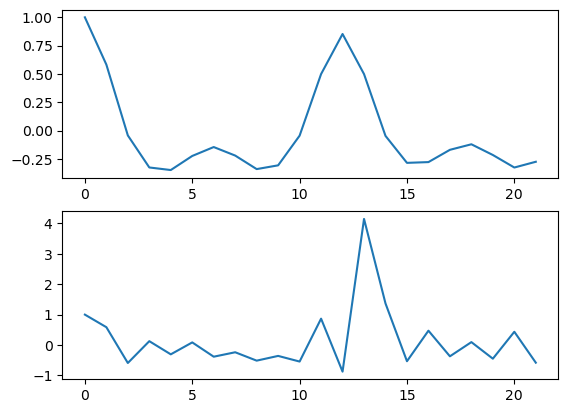

In [25]:
plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

p=2
q=1
d=2
season=12

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_data,seasonal_order=(2,2,1,12))
model_fit=model.fit()

/Users/aswinchandrasekar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aswinchandrasekar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aswinchandrasekar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
res=model_fit.forecast(24)

In [30]:
res=pd.DataFrame(res)
res.columns=['value']

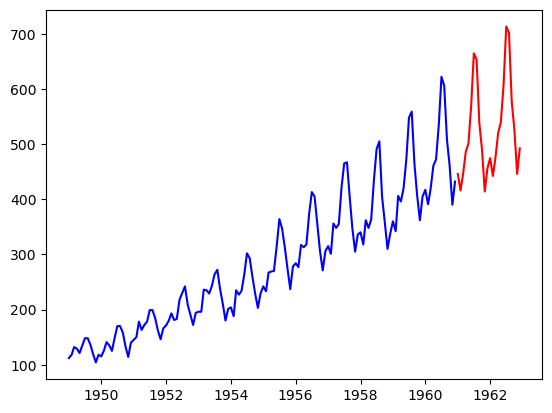

In [31]:
plt.plot(ts_data,c='blue')
plt.plot(res,c='red')